# Exercise: Circular Mask with PIL and NumPy

This notebook solves the circular mask task on `lena_gray_512.tif` and reports every step.

Steps:
- Read the image and convert it to double precision.
- Create a zero matrix (mask) of the same dimensions.
- Fill the mask with 1's inside a circle of radius 150 centered at the image center.
- Multiply the image by the mask (black outside).
- Modify to keep outside pixels visible at half intensity.


In [2]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# Import the helper script
import circular_mask_pil as cmp

# Paths
here = Path(__file__).resolve().parent if '__file__' in globals() else Path.cwd()
image_path = here / 'lena_gray_512.tif'
assert image_path.exists(), f'Image not found: {image_path}'

# Process
data = cmp.process_image(str(image_path), radius=150)
img = data['image_float64']
mask = data['mask_binary']
res_black = data['result_black_outside']
res_half = data['result_half_outside']

img.shape, img.dtype, mask.dtype


((512, 512), dtype('float64'), dtype('float64'))

## Visualize each step

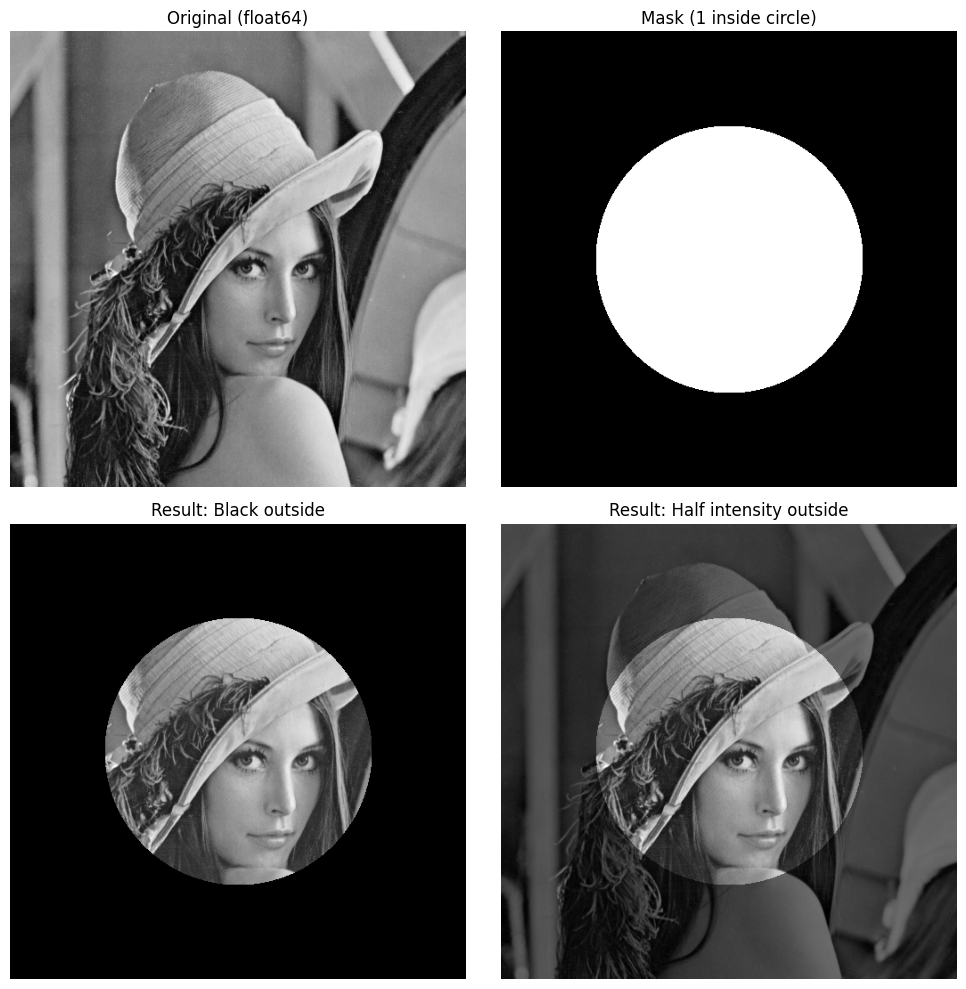

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original (float64)')
axes[0].axis('off')

axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Mask (1 inside circle)')
axes[1].axis('off')

axes[2].imshow(res_black, cmap='gray')
axes[2].set_title('Result: Black outside')
axes[2].axis('off')

axes[3].imshow(res_half, cmap='gray')
axes[3].set_title('Result: Half intensity outside')
axes[3].axis('off')

plt.tight_layout()
plt.show()


## Save outputs (optional)

In [ ]:
# Save images as PNG for reporting
out_dir = here
cmp._save_array_as_png(img, str(out_dir / '01_original_float64.png'))
cmp._save_array_as_png(mask * 255.0, str(out_dir / '02_mask_binary.png'))
cmp._save_array_as_png(res_black, str(out_dir / '03_result_black_outside.png'))
cmp._save_array_as_png(res_half, str(out_dir / '04_result_half_outside.png'))
'Saved PNG outputs.'


'Saved PNG outputs.'

: 

## Brief comparison: PIL vs OpenCV (cv2)

- **Similarities**
  - Both can read, write, and display images.
  - Both support color conversions, resizing, cropping, drawing, and basic filtering.

- **Strengths (PIL / Pillow)**
  - Pythonic, lightweight, easy for simple image I/O and manipulation.
  - Integrates nicely with NumPy; arrays are easy to convert with `np.asarray(Image)` and `Image.fromarray`.
  - Great for pipelines that generate or annotate images for reports/plots with Matplotlib.

- **Weaknesses (PIL / Pillow)**
  - Limited advanced computer vision algorithms (e.g., feature detection, optical flow, DNN inference).
  - Performance not as optimized for large-scale CV tasks.

- **Strengths (OpenCV / cv2)**
  - Very fast C++ backend; broad set of algorithms for computer vision, image processing, and video.
  - Extensive functionality: filtering, morphology, geometric transforms, feature matching, camera calibration, DNN module, etc.
  - Good for production-grade CV pipelines and real-time processing.

- **Weaknesses (OpenCV / cv2)**
  - API can be less Pythonic; color channel order is BGR by default.
  - Heavier dependency; installation can be larger and sometimes trickier.

- **Summary**
  - Use PIL for simple, lightweight image I/O and basic transformations in Python notebooks/scripts.
  - Use OpenCV when you need performance and a comprehensive set of CV algorithms or real-time video processing.
